# Teste 04 - dataset 08 CTU - 20 abr 2020
## Carregando os dados usando PANDAS

In [1]:
import pandas as pd
data = pd.read_csv("capture20110816-3.binetflow") #dataset 08 do CTU
data['Label'] = data.Label.str.contains("Botnet")

## Verificando colunas

In [2]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

### Depois de rodar o arquivo de Chebbi para gerar o arquivo Pickle
### Treinar e testar modelos
#### Carregar o arquivo Pickle, importar sua biblioteca e o arquivo de preparação dos dados:

In [3]:
import LoadData, DataPreparation, pickle, warnings
#arquivo LoadData dado pelo git do livro Mastering Machine Learning for Penetration Testing com adaptações 
#para preparar os dados do netflow e gerara o arquivo Pickle

In [4]:
warnings.filterwarnings("ignore")
LoadData.loaddata('flowdata.csv')
file = open('flowdata.pickle', 'rb')
data = pickle.load(file)

#### Selecionado a seção de dados:


In [5]:
Xdata = data[0]
Ydata = data[1]
XdataT = data[2]
YdataT = data[3]

#### Importando módulos para usar os algoritmos de aprendizado de máquina do sklearn:

In [6]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


#### Preparando os dados:

In [7]:
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)

<Prepare(Thread-4, initial)>

### Modelo de Floresta aleatória (Random forest)

In [8]:
clf = RandomForestClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreRF = clf.score(XdataT,YdataT)
precisaoRF = precision_score(Prediction,YdataT)
recallRF = recall_score(Prediction,YdataT)
acuraciaRF = accuracy_score(Prediction,YdataT)
F1RF=f1_score(Prediction,YdataT)

### Modelo de árvore de decisão

In [9]:
clf = DecisionTreeClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreTree = clf.score(XdataT,YdataT)
precisaoTree = precision_score(Prediction,YdataT)
recallTree = recall_score(Prediction,YdataT)
acuraciaTree = accuracy_score(Prediction,YdataT)
F1Tree=f1_score(Prediction,YdataT)

### Visualizando a árvores de decisão

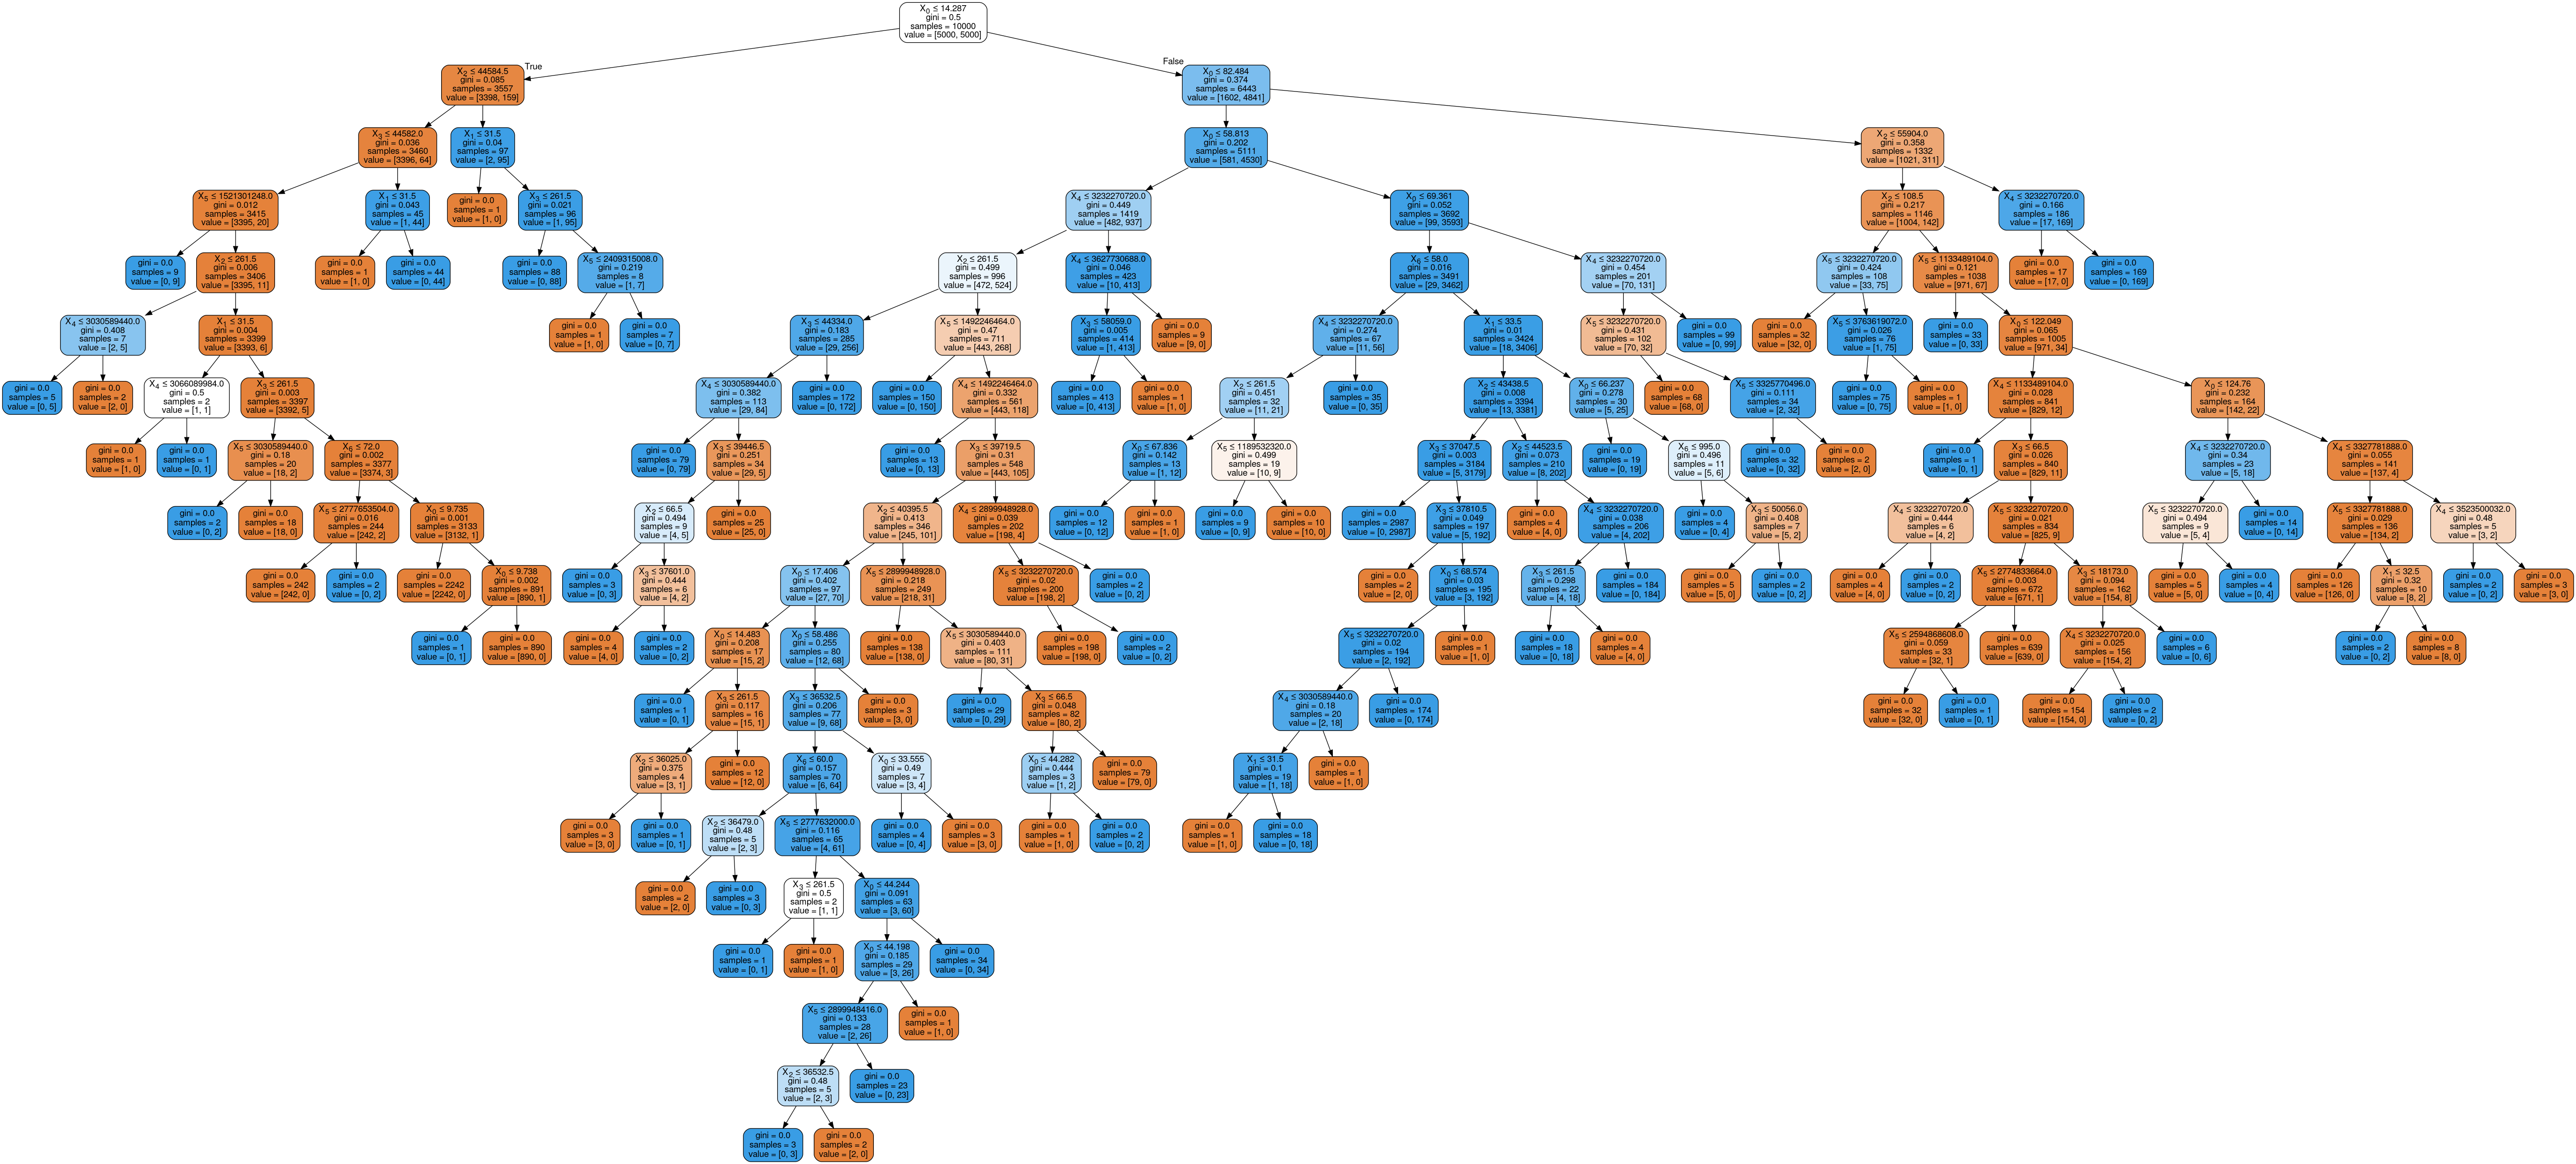

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Modelo de regressão logística

In [13]:
clf = LogisticRegression(multi_class="ovr", C=10000)
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreRL = clf.score(XdataT,YdataT)
precisaoRL = precision_score(Prediction,YdataT)
recallRL = recall_score(Prediction,YdataT)
acuraciaRL = accuracy_score(Prediction,YdataT)
F1RL =f1_score(Prediction,YdataT)

### Modelo Naive Bayes

In [14]:
clf = GaussianNB()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreNB = clf.score(XdataT,YdataT)
precisaoNB = precision_score(Prediction,YdataT)
recallNB = recall_score(Prediction,YdataT)
acuraciaNB = accuracy_score(Prediction,YdataT)
F1NB =f1_score(Prediction,YdataT)

### Modelo k-Nearest

In [15]:
clf = KNeighborsClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreKN = clf.score(XdataT,YdataT)
precisaoKN = precision_score(Prediction,YdataT)
recallKN = recall_score(Prediction,YdataT)
acuraciaKN = accuracy_score(Prediction,YdataT)
F1KN=f1_score(Prediction,YdataT)

#from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(YdataT, Prediction))

### Modelo de SVC

In [16]:
clf = SVC()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreSVC = clf.score(XdataT,YdataT)
precisaoSVC = precision_score(Prediction,YdataT)
recallSVC = recall_score(Prediction,YdataT)
acuraciaSVC = accuracy_score(Prediction,YdataT)
F1SVC =f1_score(Prediction,YdataT)


### Modelo de Análise Discriminante

In [17]:
clf = LinearDiscriminantAnalysis()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreAD = clf.score(XdataT,YdataT)
precisaoAD = precision_score(Prediction,YdataT)
recallAD = recall_score(Prediction,YdataT)
acuraciaAD = accuracy_score(Prediction,YdataT)
F1AD=f1_score(Prediction,YdataT)

# ----- Resultados ------

### [+] Acurácia:

In [18]:
print ("Acurácia Floresta aleatória (Random forest): ", acuraciaRF)
print ("Acurácia árvore de decisão: ", acuraciaTree)
print ("Acurácia regressão logística: ", acuraciaRL)
print ("Acurácia Naive Bayes: ", acuraciaNB)
print ("Acurácia k-Nearest: ", acuraciaKN)
print ("Acurácia SVC: ", acuraciaSVC)
print ("Acurácia Análise Discriminante: ", acuraciaAD)

Acurácia Floresta aleatória (Random forest):  0.9975
Acurácia árvore de decisão:  0.995
Acurácia regressão logística:  0.5
Acurácia Naive Bayes:  0.8226
Acurácia k-Nearest:  0.9939
Acurácia SVC:  0.8501
Acurácia Análise Discriminante:  0.8985


### [+] Escore

In [19]:
print ("Escore Floresta aleatória (Random forest): ", escoreRF * 100)
print ("Escore árvore de decisão: ", escoreTree * 100)
print ("Escore regressão logística: ", escoreRL * 100)
print ("Escore Naive Bayes: ", escoreNB * 100)
print ("Escore k-Nearest: ", escoreKN * 100)
print ("Escore SVC: ", escoreSVC * 100)
print ("Escore Análise Discriminante: ", escoreAD * 100)

Escore Floresta aleatória (Random forest):  99.75
Escore árvore de decisão:  99.5
Escore regressão logística:  50.0
Escore Naive Bayes:  82.26
Escore k-Nearest:  99.39
Escore SVC:  85.00999999999999
Escore Análise Discriminante:  89.85


### [+] Precisão

In [20]:
print ("Precisão Floresta aleatória (Random forest): ", precisaoRF)
print ("Precisão árvore de decisão: ", precisaoTree)
print ("Precisão regressão logística: ", precisaoRL)
print ("Precisão Naive Bayes: ", precisaoNB)
print ("Precisão k-Nearest: ", precisaoKN)
print ("Precisão SVC: ", precisaoSVC)
print ("Precisão Análise Discriminante: ", precisaoAD)

Precisão Floresta aleatória (Random forest):  0.9972
Precisão árvore de decisão:  0.9958
Precisão regressão logística:  0.0
Precisão Naive Bayes:  0.7024
Precisão k-Nearest:  0.9942
Precisão SVC:  0.715
Precisão Análise Discriminante:  0.8808


### [+] Recall (revocação)

In [21]:
print ("Recall Floresta aleatória (Random forest): ", recallRF)
print ("Recall árvore de decisão: ", recallTree)
print ("Recall regressão logística: ", recallRL)
print ("Recall Naive Bayes: ", recallNB)
print ("Recall k-Nearest: ", recallKN)
print ("Recall SVC: ", recallSVC)
print ("Recall Análise Discriminante: ", recallAD)

Recall Floresta aleatória (Random forest):  0.9977986792075245
Recall árvore de decisão:  0.9942092651757188
Recall regressão logística:  0.0
Recall Naive Bayes:  0.9246972090573986
Recall k-Nearest:  0.9936038376973816
Recall SVC:  0.979720471362017
Recall Análise Discriminante:  0.9131246112378187


### [+] F1 score

In [22]:
print ("F1 score Floresta aleatória (Random forest): ", F1RF)
print ("F1 score árvore de decisão: ", F1Tree)
print ("F1 score regressão logística: ", F1RL)
print ("F1 score Naive Bayes: ", F1NB)
print ("F1 score k-Nearest: ", F1KN)
print ("F1 score SVC: ", F1SVC)
print ("F1 score Análise Discriminante: ", F1AD)

F1 score Floresta aleatória (Random forest):  0.9974992497749324
F1 score árvore de decisão:  0.9950039968025579
F1 score regressão logística:  0.0
F1 score Naive Bayes:  0.7983632643782678
F1 score k-Nearest:  0.9939018294511646
F1 score SVC:  0.8266851659151347
F1 score Análise Discriminante:  0.8966710780820524


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(Xdata,Ydata)

X, y = Xdata, Ydata

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

ValueError: 'RBF' is not in list

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

X, y = Xdata, Ydata

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# [+] Curva de aprendizado

In [23]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [24]:
# Create feature matrix and target vector
#Xdata, Ydata, XdataT, YdataT
X, y = Xdata, Ydata

In [25]:
def CurvaAprend(modelo):
    #Criar notas de treinamento e teste de currículo para vários tamanhos de conjuntos de treinamento
    train_sizes, train_scores, test_scores = learning_curve(modelo(), 
                                                            X, 
                                                            y,
                                                            # Número de dobras na validação cruzada
                                                            cv=10,
                                                            # Métrica de avaliação
                                                            scoring='accuracy',
                                                            # núcleos do computador -1 = todos
                                                            n_jobs=-1, 
                                                            # 50 tamanhos diferentes do conjunto de treinamento
                                                            train_sizes=np.linspace(0.01, 1.0, 50))

    # Criar médias e desvios padrão das notas dos conjuntos de treinamento
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Criar médias e desvios padrão das pontuações dos conjuntos de testes
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Desenhar linhas
    plt.plot(train_sizes, train_mean, '--', color="#FF0000",  label="Pontuação do treinamento")
    plt.plot(train_sizes, test_mean, color="#81BEF7", label="Pontuação de Validação Cruzada")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#CEECF5")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#CEECF5")

    # Criar plot
    plt.title("Curva de aprendizado")
    plt.xlabel("Tamanho do conjunto de treinamento"), plt.ylabel("Acurácia"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

### Curva de aprendizado Floresta aleatória (Random forest)


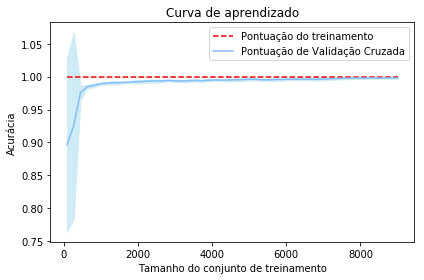

In [26]:
CurvaAprend(RandomForestClassifier)

### Curva de aprendizado árvore de decisão


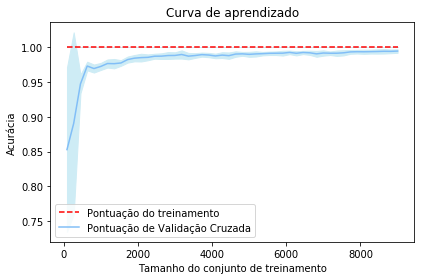

In [27]:
CurvaAprend(DecisionTreeClassifier)

### Curva de aprendizado regressão logística

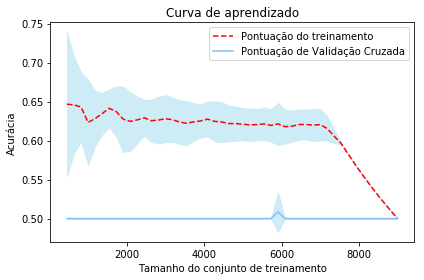

In [28]:
CurvaAprend(LogisticRegression)

### Curva de aprendizado Naive Bayes

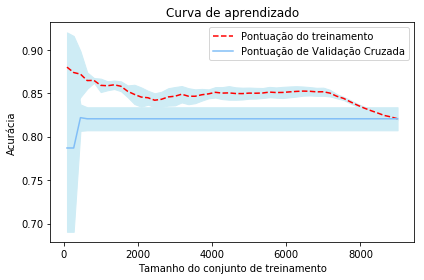

In [29]:
CurvaAprend(GaussianNB)

### Curva de aprendizado k-Nearest

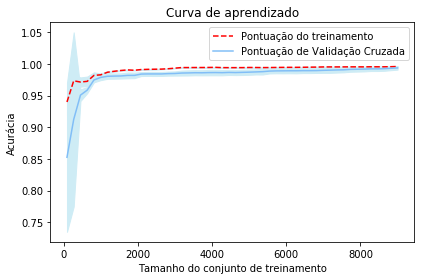

In [30]:
CurvaAprend(KNeighborsClassifier)

### Curva de aprendizado SVC

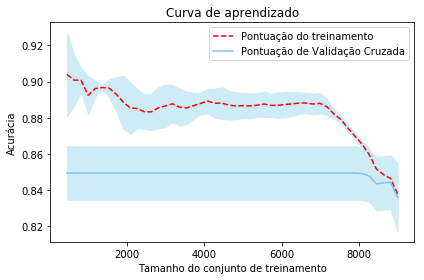

In [31]:
CurvaAprend(SVC)

### Curva de aprendizado Análise Discriminante

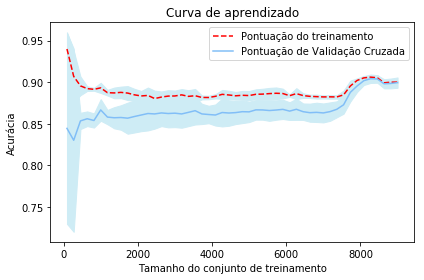

In [32]:
CurvaAprend(LinearDiscriminantAnalysis)